IMPORT LIB

In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats
 


ModuleNotFoundError: No module named 'matplotlib'

IMPORTING DATASET

In [1]:
df=pd.read_csv("property.csv")
df.head()
df.info()

NameError: name 'pd' is not defined

MEASURE OF CENTRAL TENDENCY

In [3]:
df['Price'].mean()


np.float64(1075684.079455081)

In [4]:
df['Price'].median()

903000.0

mean for multiple coloumns

In [5]:
df[['Rooms','Landsize','BuildingArea','YearBuilt']].mean()


Rooms              2.937997
Landsize         558.416127
BuildingArea     151.967650
YearBuilt       1964.684217
dtype: float64

CALCULATING MODE

In [6]:
df[['Suburb','SellerG','Regionname']].mode()

,Suburb,SellerG,Regionname
0,Reservoir,Nelson,Southern Metropolitan


SKEWNESS AND KURTOSIS

In [7]:
df['Price'].skew()

np.float64(2.239624312529873)

<Axes: xlabel='Price', ylabel='Count'>

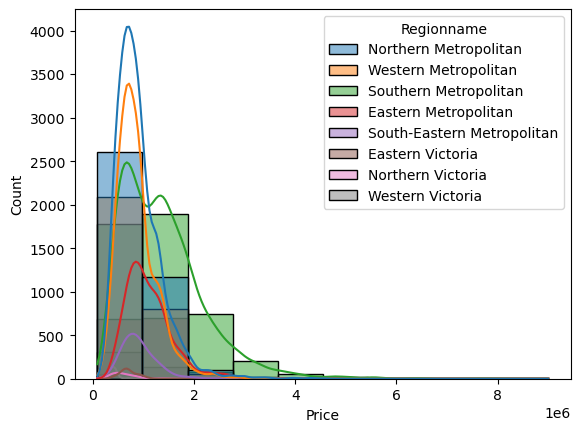

In [8]:
sns.histplot(x=df['Price'],bins=10,kde=True,hue=df['Regionname'])

In [9]:
df['Rooms'].skew()


np.float64(0.37647803278204356)

<Axes: xlabel='Rooms', ylabel='Count'>

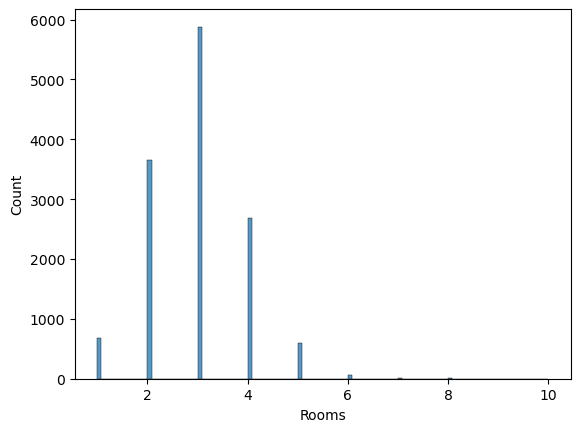

In [10]:
sns.histplot(df['Rooms'])

In [11]:
df['YearBuilt'].skew()


np.float64(-1.5412787597590965)

<Axes: xlabel='YearBuilt', ylabel='Count'>

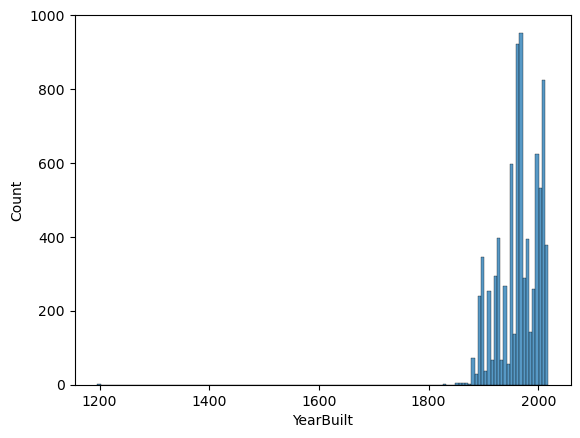

In [12]:
sns.histplot(df['YearBuilt'])

KURTOSIS

In [13]:
df['Price'].kurt()

np.float64(9.87433888590604)

<Axes: xlabel='Price', ylabel='Density'>

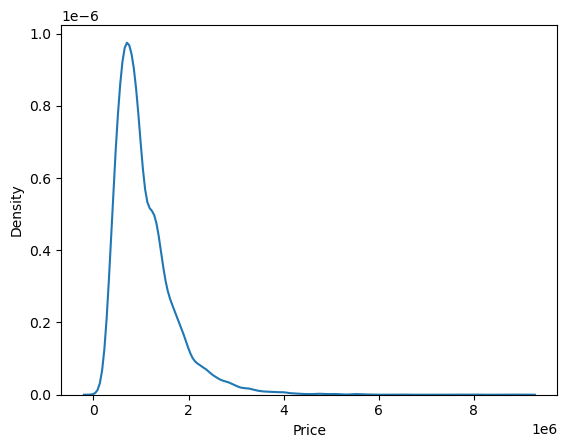

In [14]:
#Density plot
sns.kdeplot(df['Price'])

MEASURE OF VARIABILITY
1. RANGE
2. VARIANCE
3. DISPERSION


In [15]:
#RANGE = max-min
max_price=df['Price'].max()
min_price=df['Price'].min()
range_price=max_price-min_price
print("Max= ",max_price)
print("Min= ",min_price)
print("Range= ",range_price)

Max=  9000000
Min=  85000
Range=  8915000


In [16]:
# Relative Range---> Coefficient of range
# Coefficient of Range= (max-min)/(max+min)
coeff_range=(range_price)/(max_price+ min_price)
print(coeff_range)

0.9812878370941112


In [17]:
#Variance
df['Rooms'].var()

0.9134541217971167

In [18]:
#std dev
df['Price'].std()

639310.7242960194

IQR CALCULATION

In [19]:
# Q1
q1=df['Price'].quantile(0.25)

#Q2
q2=df['Price'].median()

#Q3
q3=df['Price'].quantile(0.75)

print("Min: ",min_price,"Q1: ",q1,"Q2: ",q2,"Q3: ",q3,"Max: ",max_price)

Min:  85000 Q1:  650000.0 Q2:  903000.0 Q3:  1330000.0 Max:  9000000


In [20]:
#IQR= Q3-Q1

iqr_price=q3-q1
print("IQR:",iqr_price)


IQR: 680000.0


In [21]:
#quartile deviation - absolute measure
qd_price=(q3-q1)/2
print("Quartile Deviation for Price:",qd_price)

Quartile Deviation for Price: 340000.0


In [22]:
#coeff of quartile deviation - relative measure
coeff_price=(q3-q1)/(q3+q1)
print("Coefficient of quartile deviation:",coeff_price)

Coefficient of quartile deviation: 0.3434343434343434


<Axes: xlabel='Rooms', ylabel='Regionname'>

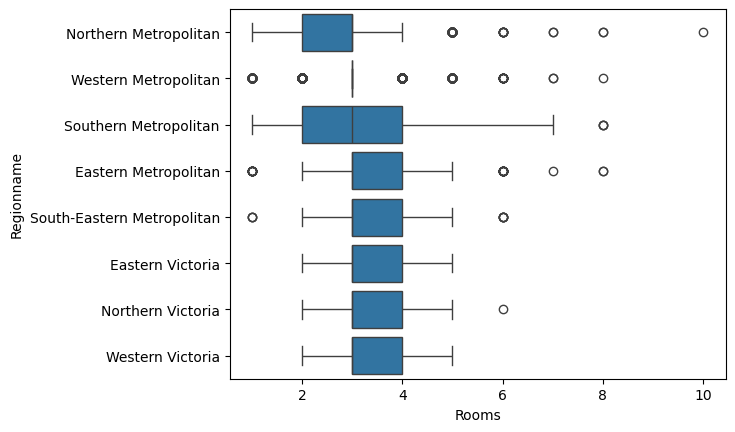

In [23]:
# Multiple value box plot
sns.boxplot(x=df['Rooms'],y=df['Regionname'])

<Axes: xlabel='Propertycount', ylabel='Regionname'>

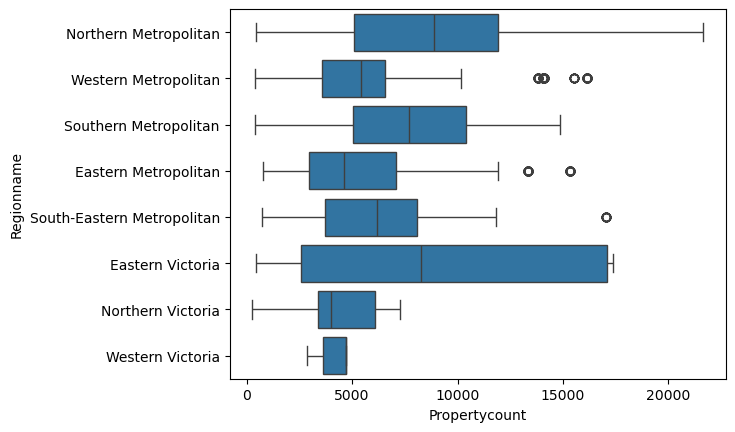

In [24]:
sns.boxplot(x=df['Propertycount'],y=df['Regionname'])

In [25]:
df['Suburb'].value_counts()

Suburb
Reservoir         359
Richmond          260
Bentleigh East    249
Preston           239
Brunswick         222
                 ... 
Attwood             1
Wallan              1
New Gisborne        1
Plumpton            1
Monbulk             1
Name: count, Length: 314, dtype: int64

<Axes: xlabel='Price', ylabel='Count'>

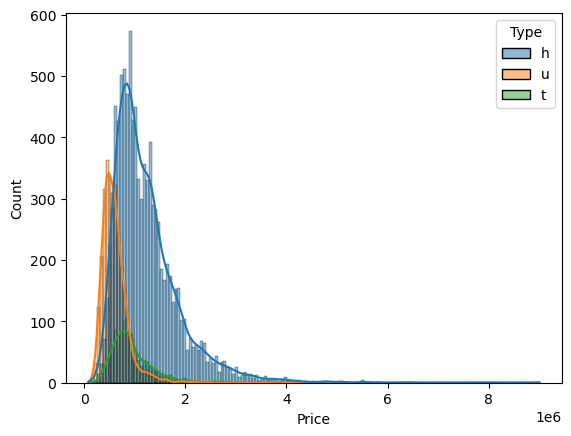

In [26]:
sns.histplot(df,x='Price',kde=True,hue='Type')

In [27]:
df_altona=df[df['Suburb']=='Altona']
df_altona.value_counts()


Suburb  Address           Rooms  Type  Price    Method  SellerG        Date        Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  BuildingArea  YearBuilt  CouncilArea  Lattitude  Longtitude  Regionname            Propertycount
Altona  1/123 Blyth St    2      t     720000   S       hockingstuart  04-02-2016  13.8      3018      2         1         2.0  292       125.0         2013.0     Hobsons Bay  -37.86870  144.81970   Western Metropolitan  5301             1
        1/136 Queen St    2      u     580000   S       Barlow         08-10-2016  13.8      3018      2         1         1.0  225       93.0          1988.0     Hobsons Bay  -37.86960  144.82700   Western Metropolitan  5301             1
        1/170 Blyth St    3      u     630000   S       Barlow         06-08-2016  13.8      3018      2         1         2.0  311       94.0          1955.0     Hobsons Bay  -37.87020  144.81430   Western Metropolitan  5301             1
        1/20 Mulga St     3      t     765000

<Axes: xlabel='Price', ylabel='Count'>

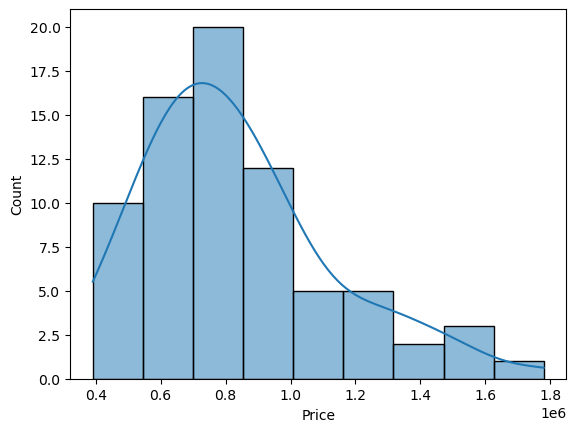

In [28]:
sns.histplot(df_altona,x='Price',kde=True)

In [29]:
print("Mean:",df_altona['Price'].mean())
print("Median:",df_altona['Price'].median)


Mean: 834830.4054054054
Median: <bound method Series.median of 141       520000
142      1525000
143       720000
144      1120000
145       780000
          ...   
12216     913000
12432     458000
12634    1248500
13338     920000
13339     801250
Name: Price, Length: 74, dtype: int64>


For the suburb of Altona, it is postulated that a typical property sells for
$800,000. Use the data at hand to test this assumption. Is the typical property
price really $800,000 or has it increased? Use a significance level of 5%.

In [30]:
altona_prices = df[df["Suburb"].str.lower() == "altona"]["Price"].dropna()

# Population mean (hypothesized value)
mu_0 = 800000

# Perform one-sample t-test (right-tailed)
t_stat, p_value_two_tailed = stats.ttest_1samp(altona_prices, mu_0)

# Convert to one-tailed p-value (since we test if mean > 800000)
p_value_one_tailed = p_value_two_tailed / 2 if t_stat > 0 else 1 - (p_value_two_tailed / 2)

# Print results
print(f"Sample mean price for Altona: ${altona_prices.mean():,.2f}")
print(f"T-statistic: {t_stat:.3f}")
print(f"One-tailed p-value: {p_value_one_tailed:.4f}")

# Conclusion
if p_value_one_tailed < 0.05:
    print("Reject Null Hypothesis: Evidence suggests property prices in Altona have increased above $800,000.")
else:
    print("Fail to reject Null Hypothesis: No strong evidence that property prices in Altona exceed $800,000.")

Sample mean price for Altona: $834,830.41
T-statistic: 1.028
One-tailed p-value: 0.1537
Fail to reject Null Hypothesis: No strong evidence that property prices in Altona exceed $800,000.


For the year 2016, is there any difference in the prices of properties sold in the
summer months vs winter months? Consider months from October till March
as winter months and rest as summer months. Use a significance level of 5%.

In [31]:
# Ensure date is parsed properly
df["Date"] = pd.to_datetime(df["Date"], errors="coerce", dayfirst=True)

# Filter only for 2016
data_2016 = df[df["Date"].dt.year == 2016]

# Define winter (Oct-Mar) and summer (Apr-Sep)
winter_months = [10, 11, 12, 1, 2, 3]
summer_months = [4, 5, 6, 7, 8, 9]

# Split data
winter_prices = data_2016[data_2016["Date"].dt.month.isin(winter_months)]["Price"].dropna()
summer_prices = data_2016[data_2016["Date"].dt.month.isin(summer_months)]["Price"].dropna()

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(winter_prices, summer_prices, equal_var=False)

# Print summary
print(f"Winter mean: ${winter_prices.mean():,.2f}")
print(f"Summer mean: ${summer_prices.mean():,.2f}")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.4f}")

# Conclusion
if p_value < 0.05:
    print('Reject H₀: There is a significant difference in mean property prices between summer and winter (2016).')
else:
    print('Fail to reject H₀: No significant difference in mean property prices between summer and winter (2016).')

Winter mean: $1,116,647.59
Summer mean: $1,048,054.73
T-statistic: 3.921
P-value: 0.0001
Reject H₀: There is a significant difference in mean property prices between summer and winter (2016).


For the suburb of Abbotsford, what is the probability that out of 10 properties
sold, 3 will not have a car parking space? Use the column car in the dataset.
Round off your answer to 3 decimal places.

In [49]:
from scipy.stats import binom
abbotsford = df[df["Suburb"].str.lower() == "abbotsford"]

# Drop missing car values (simpler)
abbotsford = abbotsford.dropna(subset=["Car"])

# Estimate probability that a property has NO car space
p_no_car = (abbotsford["Car"] == 0).mean()

# Given values
n = 10   # total properties
k = 3    # properties with no car space

# Binomial probability P(X = 3)
probability = binom.pmf(k, n, p_no_car)

# Round to 3 decimal places
print("Probability of property not having a car parking space :",round(probability, 3))

Probability of property not having a car parking space : 0.26


In the suburb of Abbotsford, what are the chances of finding a property with 3
rooms? Round your answer to 3 decimal places.

In [48]:
abbotsford = df[df["Suburb"].str.lower() == "abbotsford"]

# Drop missing room values (if any)
abbotsford = abbotsford.dropna(subset=["Rooms"])

# Calculate probability that a property has 3 rooms
p_3rooms = (abbotsford["Rooms"] == 3).mean()

# Round to 3 decimal places
print("Probability of finding rooms with 3 rooms",round(p_3rooms, 3))

Probability of finding rooms with 3 rooms 0.357


In the suburb of Abbotsford, what are the chances of finding a property with 2
bathrooms? Round your answer to 3 decimal places

In [46]:
abbotsford_bath=(abbotsford["Bathroom"] ==2 ).mean()
print("Probability of finding a property with 2 bathrooms",round(abbotsford_bath,3))

Probability of finding a property with 2 bathrooms 0.339
